This notebook includes information about the commands and files used to train the Allegro models and print the training metrics to evaluate training performance. For additional information on the description of the model Architecture and parameters, readers of this notebook are refered to Allegro documentation and tutorial links provided below:

- https://arxiv.org/abs/2204.05249
- https://github.com/mir-group/allegro
- https://colab.research.google.com/drive/1yq2UwnET4loJYg_Fptt9kpklVaZvoHnq

The configuration files used to generate the models used in our paper are provided in the current working directory. To train a spcecific model uncomment the comamnd block specified for it. For tutorial puroposes we will continue working with the moel trained with the Boltzmann Distribution. 

This notebook assumes a working installation of the Allegro package. Ideally with GPU usability. 

In [2]:
import os

In [3]:
## Allegro (and Nequip) command for training the model with the Boltzmann Distribution
train_config_file = 'But_BoltzDist_CLC.yaml'

# ## Allegro (and Nequip) command for training the model with the Uniform Distribution
# train_config_file = 'But_UnivDist_CLC.yaml'

# ## Allegro (and Nequip) command for training the model with the Half Left Uniform Distribution
# train_config_file = 'But_HalfLeft_UnivDist.yaml'

# ## Allegro (and Nequip) command for training the model with the Half Right Uniform Distribution
# train_config_file = 'But_HalfRight_UnivDist.yaml'

# ## Allegro (and Nequip) command for training the model with the Bias Left Distribution
# train_config_file = 'But_BiasLeft_Dist.yaml'

# ## Allegro (and Nequip) command for training the model with the Bias Right Distribution
# train_config_file = 'But_BiasRight_Dist.yaml'

# ## Allegro (and Nequip) command for training the model with the Bias Half Left Distribution
# train_config_file = 'But_BiasHalfLeft_Dist.yaml'

# ## Allegro (and Nequip) command for training the model with the Bias Half Right Distribution
# train_config_file = 'But_BiasHalfRight_Dist.yaml'

## Allegro (and Nequip) command for training the model with the Case A Distribution (Omin)
# train_config_file = 'But_CaseA_Omin_Dist.yaml'

## Allegro (and Nequip) command for training the model with the Case B Distribution (Conv20ps)
# train_config_file = 'But_CaseA_Omin_Dist.yaml'

In [4]:
# ## Run the training command 
# os.system(f'nequip-train {train_config_file}')

After training a directorey named, results will be generated. FO r effects of the tutorial the current results directory has the training metrics for the model trained with the Boltzmann Distribution. The next step is to vizualize the trainig metrics. 

In [5]:
# imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ase
from ase.io import read
from sklearn.metrics import r2_score


In [6]:
# Define path to 'metrics_epocs.csv' file. Load it and print the names of the columns whic can be called 
epoch_metrics_file = './results_BD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/metrics_epoch.csv'

## results directories of other model aare created after training. 

# Load to pandas data frame 
epoch_metrics = pd.read_csv(epoch_metrics_file)

# Print metrics that can be plotted
for i, metric in enumerate(epoch_metrics.columns):
    print(f'{i}. {metric}')


0. epoch
1.  wall
2.  LR
3. training_loss_f
4. training_loss_e
5. training_loss
6. training_f_mae
7. training_f_rmse
8. training_H_f_mae
9. training_C_f_mae
10. training_psavg_f_mae
11. training_H_f_rmse
12. training_C_f_rmse
13. training_psavg_f_rmse
14. training_e_mae
15. training_e/N_mae
16. validation_loss_f
17. validation_loss_e
18. validation_loss
19. validation_f_mae
20. validation_f_rmse
21. validation_H_f_mae
22. validation_C_f_mae
23. validation_psavg_f_mae
24. validation_H_f_rmse
25. validation_C_f_rmse
26. validation_psavg_f_rmse
27. validation_e_mae
28. validation_e/N_mae


In [7]:
epoch_metrics.columns[5]

'training_loss'

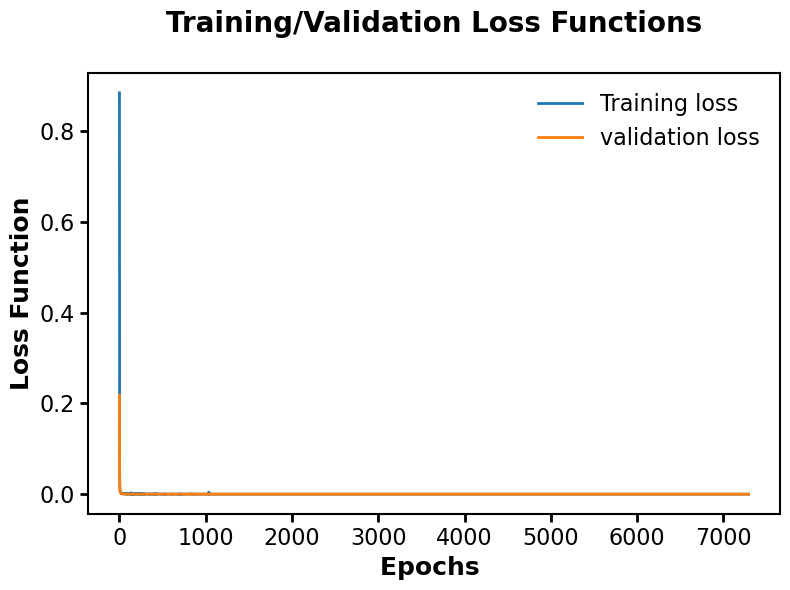

In [8]:
# Define plot 1 and plot 2 number to select wich metrics are to be plotted
plot_1 = 5
plot_2 = 18

plt.figure(figsize=(8, 6))
# plt.plot(epoch_metrics['epoch'],epoch_metrics['training_loss'],label='Training loss',linewidth=2)
# plt.plot(epoch_metrics['epoch'],epoch_metrics['validation_loss'],label='validation loss',linewidth=2)
plt.plot(epoch_metrics['epoch'],epoch_metrics[epoch_metrics.columns[plot_1]],label='Training loss',linewidth=2)
plt.plot(epoch_metrics['epoch'],epoch_metrics[epoch_metrics.columns[plot_2]],label='validation loss',linewidth=2)


plt.xlabel('Epochs ',fontsize=18,fontweight='bold')
plt.ylabel('Loss Function',fontsize=18,fontweight='bold')
plt.title('Training/Validation Loss Functions\n',fontsize=20,fontweight='bold')
plt.legend(loc='upper right',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14,width=2,length=6)
# Bold borders 
for spine in plt.gca().spines.values():
    spine.set_visible(True)
    spine.set_linewidth(1.5)

# Increase tick size
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.legend(loc='upper right',fontsize=16,frameon=False)
#plt.savefig('ModelA_Loss.png', dpi=400, bbox_inches='tight')
plt.show()


Now that the model has finish training we can proceeed to build the model, in the format in which will be used for testing and molecular dynamic simulations. For tutorial purposes we will continue to work with the model trained with the Boltzman distribution but code relevant to other models is included in comments. To prepare either of the other models uncomment the relevant code in all dependent notebooks. 

In [ ]:
# # Run the code below to build the model train with Boltzmann Distribution 
name = 'Butane_CLC_BoltzDist'
# os.system(f'nequip-deploy build --train-dir results_BD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')

# # Run the code below to build the model train with Uniform Distribution 
# name = 'Butane_CLC_UnivDist'
# os.system(f'nequip-deploy build --train-dir results_UD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')

# # Run the code below to build the model train with Half Left Uniform Distribution 
# name = 'Butane_CLC_HL_UnivDist'
# os.system(f'nequip-deploy build --train-dir results_HLUD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')

# # Run the code below to build the model train with Half Right Uniform Distribution 
# name = 'Butane_CLC_HR_UnivDist'
# os.system(f'nequip-deploy build --train-dir results_HRUD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')


# # Run the code below to build the model train with Bias Left Distribution 
# name = 'Butane_CLC_BL_Dist'
# os.system(f'nequip-deploy build --train-dir results_BLD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')

# # Run the code below to build the model train with Bias Right Distribution 
# name = 'Butane_CLC_BR_Dist'
# os.system(f'nequip-deploy build --train-dir results_BRD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')


# # Run the code below to build the model train with Bias Half Left Distribution 
# name = 'Butane_CLC_BHL_Dist'
# os.system(f'nequip-deploy build --train-dir results_BHLD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')

# # Run the code below to build the model train with Bias Half Right Distribution 
# name = 'Butane_CLC_BHR_Dist'
# os.system(f'nequip-deploy build --train-dir results_BHRD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')


# # Run the code below to build the model train with CaseA_Omin Distribution 
# name = 'Butane_CLC_caseA_Dist'
# os.system(f'nequip-deploy build --train-dir results_caseA/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')

# # Run the code below to build the model train with CaseB_Omin Distribution 
# name = 'Butane_CLC_caseB_Dist'
# os.system(f'nequip-deploy build --train-dir results_caseB/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/ ./{name}.pth')




Now that the model is build we can used to valuate its accuracy to predict the potential energy and atomic forces of cconfigutrations included in a test dataset. NOte that for tutorial purposes only a test dataset was created for the model trained with the Boltzmann distribution. The proces to generate this test datasets is the same as the one explained for the training datasets in the prep_train_CLC directory. 

Additionally, to evaluate the models with a dataset different to the one used for training one has to change the path of the config.yaml file inside the results_*/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/. In this file, change the "dataset_file_name" key to the path of the testing data set. For best practices create a copy of the config.yaml file and call it config_test.yaml. 



In [ ]:
# ## Uncomment the code bellow to evaluate the test data of the Bolzmann Distribution model 
# output = 'Butane_BoltzDist_CLC_test'
# os.system(f"nequip-evaluate --dateset-config results_BD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# ## Uncomment the code bellow to evaluate the test data of the Uniform Distribution model 
# output = 'Butane_UnivDist_CLC_test'
# os.system(f"nequip-evaluate --dateset-config results_UD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# # Uncomment the code bellow to evaluate the test data of the Half Left Uniform Distribution model 
# output = 'Butane_HL_UnivDist_CLC_test'
# os.system(f"nequip-evaluate --dateset-config results_HLUD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# # Uncomment the code bellow to evaluate the test data of the Half Right Uniform Distribution model 
# output = 'Butane_HR_UnivDist_CLC_test'
# os.system(f"nequip-evaluate --dateset-config results_HRUD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# # Uncomment the code bellow to evaluate the test data of the Bias Left Distribution model 
# output = 'Butane_BLD_CLC_test'
# os.system(f"nequip-evaluate --dateset-config results_BLD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")

# # Uncomment the code bellow to evaluate the test data of the Bias Right Distribution model 
# output = 'Butane_BRD_CLC_test'
# os.system(f"nequip-evaluate --dateset-config results_BRD/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")


# # Uncomment the code bellow to evaluate the test data of the Case A (Omin) Distribution model 
# output = 'Butane_caseA_CLC_test'
# os.system(f"nequip-evaluate --dateset-config results_caseA/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")


# # Uncomment the code bellow to evaluate the test data of the Case B (Conv20ps) Distribution model 
# output = 'Butane_caseB_CLC_test'
# os.system(f"nequip-evaluate --dateset-config results_caseB/but_500F_rc4_Lmax3_NumL3/but_500F_BD_1_debug/config_test.yaml --model {name}.pth  --batch-size 1 --output {output}.xyz --device cpu")


At this point the model has been evaluated against a data set and the predictions are stored in a file name {output}.xyz. Use this file in combination to the test dataset (npz format) to compare predicted vs actual values and calculate accuracy metrics. 

In [11]:
## Define path to test results (xyz evaluation output) and the test data (npz file)

test_results = './Butane_BoltzDist_CLC_test.xyz'
test_data  = '../prep_train_CLC/CLC_dataset_preparation/but_BD_test.npz'

# read xyz with ase and load npz with numpy 
test_results = read(test_results,index = ':')
test_data = np.load(test_data)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


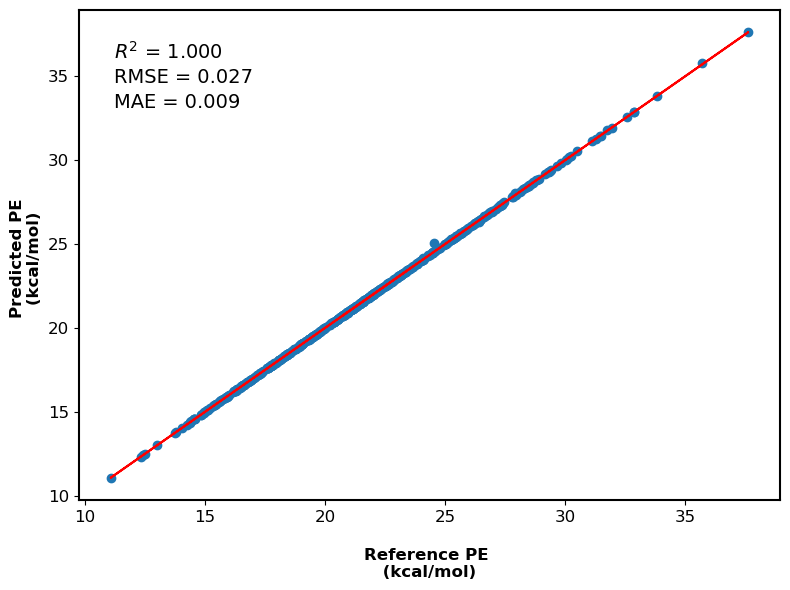

In [14]:
# Repeat for test data

# Create an array of zerow of length test_results to store energies
energies_test = np.zeros(len(test_results))

# Create a for loop to read each of the energies from the test_results file and store them in the array
for i in range(len(test_results)):
    energies_test[i] = test_results[i].get_potential_energy()
    
# Separate the energy from the test data
test_data_e = test_data['E']

#  Determinme the R2 value for the energies using numpy
r2_test = r2_score(test_data_e, energies_test)

# Determine the rmse
rmse_test = np.sqrt(np.mean((test_data_e - energies_test)**2))

# Determine the MAE
mae_test = np.mean(np.abs(test_data_e - energies_test))

#Plot the energies for the train data
plt.figure(figsize=(8,6))
#plt.title('Energy NNFF-Predictions vs Test Data \n',fontsize=20,fontweight='bold')
plt.scatter(energies_test, test_data_e)
plt.plot(test_data_e, test_data_e, color='red')
plt.text(0.05, 0.9, '$R^2$ = %0.3f' % r2_test, transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.85, 'RMSE = %0.3f' % rmse_test, transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.8, 'MAE = %0.3f' % mae_test, transform=plt.gca().transAxes, fontsize=14)

plt.xlabel('\nReference PE \n (kcal/mol) ',fontsize=12,fontweight='bold')
plt.ylabel('Predicted PE \n(kcal/mol) ',fontsize=12,fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=11,loc='upper left',frameon=False)

# Darken the borders of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(1.5)
ax.spines['right'].set_linewidth(1.5)
ax.spines['bottom'].set_linewidth(1.5)
ax.spines['left'].set_linewidth(1.5)

plt.tight_layout()

# save the plot
# plt.savefig('BD_EPred_test.png', dpi=400)
plt.show()


In [21]:
# FOr the forces
# REad the forces from the .xyz file 
forces = np.zeros((len(test_results), 14, 3))
for i in range(len(test_results)):
    forces[i] = test_results[i].get_forces()

# Define the prediction and test array of the forces in x, y, and z directions 
test_pred_fx = forces[:,:,0]
test_pred_fy = forces[:,:,1]
test_pred_fz = forces[:,:,2]

test_fx = test_data['F'][:,:,0]
test_fy = test_data['F'][:,:,1]
test_fz = test_data['F'][:,:,2]

# Determine r2 value for the forces in the x direction
test_r2_fx = r2_score(test_pred_fx, test_fx)
# Determine r2 value for the forces in the y direction
test_r2_fy = r2_score(test_pred_fy, test_fy)
# Determine r2 value for the forces in the z direction
test_r2_fz = r2_score(test_pred_fz, test_fz)

# Determine the rmse for the three directions
test_rmse_fx = np.sqrt(np.mean((test_pred_fx - test_fx)**2))
test_rmse_fy = np.sqrt(np.mean((test_pred_fy - test_fy)**2))
test_rmse_fz = np.sqrt(np.mean((test_pred_fz - test_fz)**2))

# Detemrine the MAE for the three directions
test_mae_fx = np.mean(np.abs(test_pred_fx - test_fx))
test_mae_fy = np.mean(np.abs(test_pred_fy - test_fy))
test_mae_fz = np.mean(np.abs(test_pred_fz - test_fz))


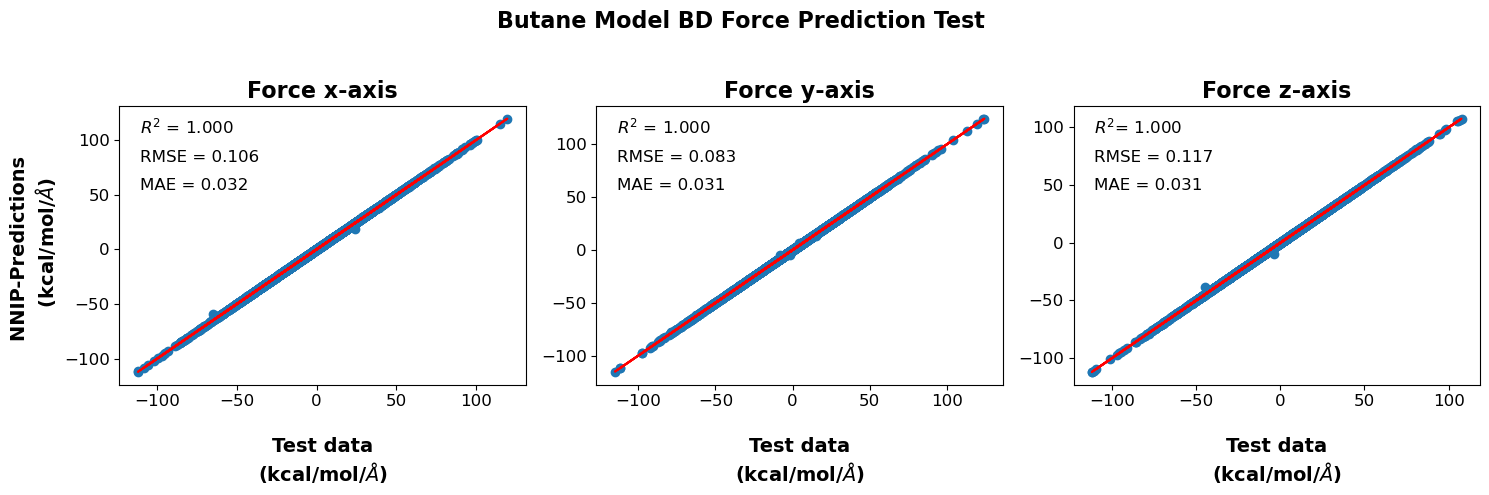

In [22]:
## Plot panels of force component prediction analysis
# Create a figure with one row and three columns
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Add vertical and horizontal space between the subplots
fig.subplots_adjust(hspace=0.5, wspace=0.2)

# Add title to the figure
fig.suptitle('Butane Model BD Force Prediction Test \n', fontsize=16, fontweight='bold')

# Plot the predicted forces in the x direction vs the test forces in the x direction
axs[0].scatter(test_fx, test_pred_fx)
axs[0].plot(test_fx, test_fx, color='red')
axs[0].text(0.05, 0.9, '$R^2$ = %0.3f' % test_r2_fx, transform=axs[0].transAxes, fontsize=12)
axs[0].text(0.05, 0.8, 'RMSE = %0.3f' % test_rmse_fx, transform=axs[0].transAxes, fontsize=12)
axs[0].text(0.05, 0.7, 'MAE = %0.3f' % test_mae_fx, transform=axs[0].transAxes, fontsize=12)
axs[0].set_title('Force x-axis', fontsize=16, fontweight='bold')
axs[0].set_xlabel('\nTest data\n(kcal/mol/$\\AA$)', fontsize=14, fontweight='bold')
axs[0].set_ylabel('NNIP-Predictions \n (kcal/mol/$\\AA$)', fontsize=14, fontweight='bold')
axs[0].tick_params(axis='both', which='major', labelsize=12)

# Plot the predicted forces in the y direction vs the test forces in the y direction
axs[1].scatter(test_fy, test_pred_fy)
axs[1].plot(test_fy, test_fy, color='red')
axs[1].text(0.05, 0.9, '$R^2$ = %0.3f' % test_r2_fy, transform=axs[1].transAxes, fontsize=12)
axs[1].text(0.05, 0.8, 'RMSE = %0.3f' % test_rmse_fy, transform=axs[1].transAxes, fontsize=12)
axs[1].text(0.05, 0.7, 'MAE = %0.3f' % test_mae_fy, transform=axs[1].transAxes, fontsize=12)
axs[1].set_title('Force y-axis', fontsize=16, fontweight='bold')
axs[1].set_xlabel('\nTest data\n(kcal/mol/$\\AA$)', fontsize=14, fontweight='bold')
axs[1].tick_params(axis='both', which='major', labelsize=12)

# Plot the predicted forces in the z direction vs the test forces in the z direction
axs[2].scatter(test_fz, test_pred_fz)
axs[2].plot(test_fz, test_fz, color='red')
axs[2].text(0.05, 0.9, '$R^2$= %0.3f' % test_r2_fz, transform=axs[2].transAxes, fontsize=12)
axs[2].text(0.05, 0.8, 'RMSE = %0.3f' % test_rmse_fz, transform=axs[2].transAxes, fontsize=12)
axs[2].text(0.05, 0.7, 'MAE = %0.3f' % test_mae_fz, transform=axs[2].transAxes, fontsize=12)
axs[2].set_title('Force z-axis', fontsize=16, fontweight='bold')
axs[2].set_xlabel('\nTest data\n(kcal/mol/$\\AA$)', fontsize=14, fontweight='bold')
axs[2].tick_params(axis='both', which='major', labelsize=12)

# Save the figure
# plt.savefig(title.replace(' ','_')+ '.png', dpi=300, bbox_inches='tight')
plt.tight_layout()
plt.show()



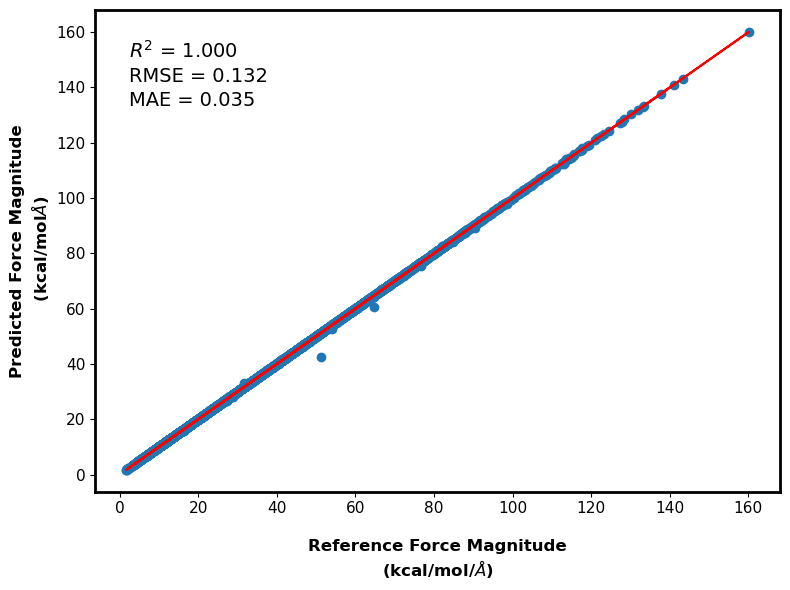

In [20]:
# Determine the magnitud of the foreces for the test data
test_pred_fmag = np.sqrt(test_pred_fx**2 + test_pred_fy**2 + test_pred_fz**2)
test_fmag = np.sqrt(test_fx**2 + test_fy**2 + test_fz**2)

# Determine the r2 value for the magnitude of the forces
test_r2_fmag = r2_score(test_pred_fmag, test_fmag)

# Determine the rmse for the magnitude of the forces
test_rmse_fmag = np.sqrt(np.mean((test_pred_fmag - test_fmag)**2))

# Determine the MAE for the magnitude of the forces
test_mae_fmag = np.mean(np.abs(test_pred_fmag - test_fmag))

# Plot the predicted magnitude of the forces vs the test magnitude of the forces
plt.figure(figsize=(8, 6))
plt.scatter(test_fmag, test_pred_fmag)
plt.plot(test_fmag, test_fmag, color='red')
plt.text(0.05, 0.9, '$R^2$ = %0.3f' % test_r2_fmag, transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.85, 'RMSE = %0.3f' % test_rmse_fmag, transform=plt.gca().transAxes, fontsize=14)
plt.text(0.05, 0.8, 'MAE = %0.3f' % test_mae_fmag, transform=plt.gca().transAxes, fontsize=14)
# plt.title('Model BD: CLC Force Prediction Test\n', fontsize=20, fontweight='bold')
plt.xlabel('\nReference Force Magnitude\n(kcal/mol/$\\AA$)', fontsize=12, fontweight='bold')
plt.ylabel('Predicted Force Magnitude\n (kcal/mol$\\AA$)', fontsize=12, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tick_params(axis='both', which='major', labelsize=11)
# Darken the borders of the plot
ax = plt.gca()
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)

plt.tight_layout()

# Save the figure
#plt.savefig('Force_ModA_Preds.png', dpi=400, bbox_inches='tight')
plt.show()



The model has been evaluated succesfully and can now be used for Deep Potential Molecular Dynamics (DPMD) simulations